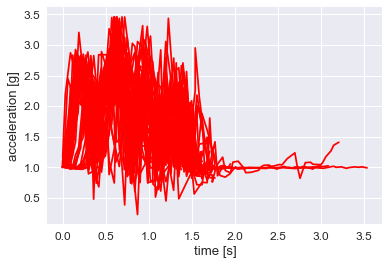

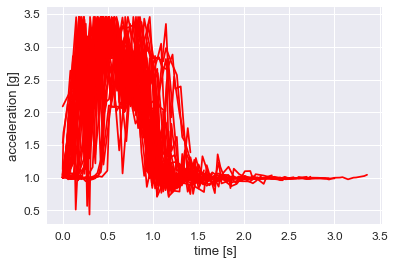

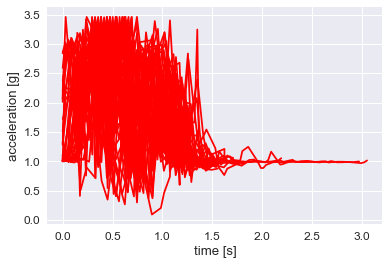

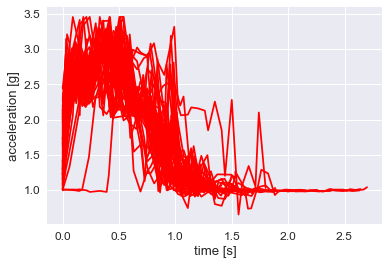

In [18]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

kicktype = ["TurningKick", "AxeKick", "CutKick", "CrescentKick"]
export_list = []

for type in kicktype:
    path = "csv/Right_" + type + "_CSV/"
    for x in range(50):
        allFiles = (path+type+str(x+1)+"_Accelerometer.csv")
        allGyroscopeFiles = (path+type+str(x+1)+"_Gyroscope.csv")

        df = pandas.read_csv(allFiles, skiprows=4)
        df.dropna(subset = ["Date"], inplace=True)
        acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
        acc = np.sqrt(acc)

        for i, j in enumerate(acc[:-1]):
            if (j < acc[i+1])and(j>1000): 
                start = i
                break

        end = max(idx for idx, val in enumerate(acc)  
                                          if (val > 1020))

        acc=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000

        df2 = pandas.read_csv(allGyroscopeFiles, skiprows=4)
        df2.dropna(subset = ["Date"], inplace=True)
        df2=df2.iloc[start:end]

        export_list.append([acc.mean(), acc.std(), acc.min(), acc.max(), kicktype.index(type)+1, df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2['X (dps)'].max()
                           , df2['Y (dps)'].mean(), df2['Y (dps)'].std(), df2['Y (dps)'].min(), df2['Y (dps)'].max()
                           , df2['Z (dps)'].mean(), df2['Z (dps)'].std(), df2['Z (dps)'].min(), df2['Z (dps)'].max()])

        acc=np.array(acc)/1000
        HostTime = np.array(HostTime)

        plt.plot(HostTime,acc,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
    plt.show()


with open('Accelerometer.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "kick_Type", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)
    
    
    

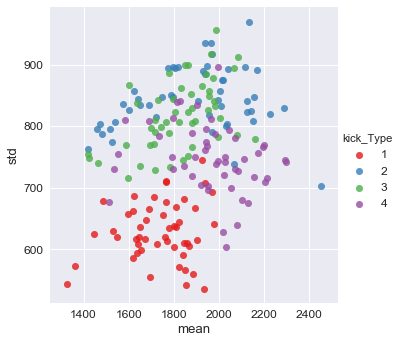

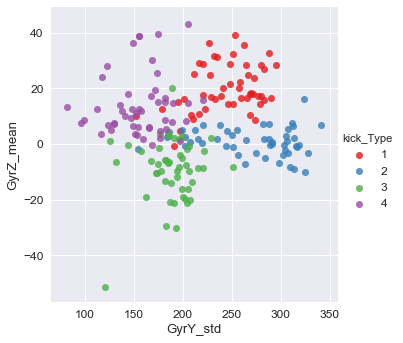

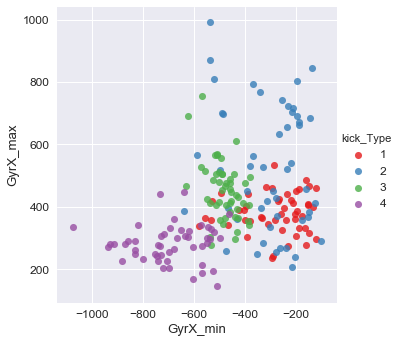

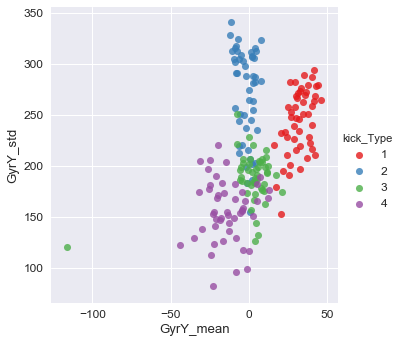

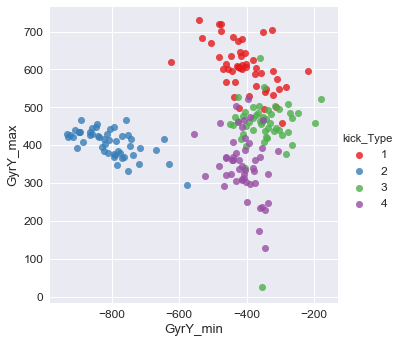

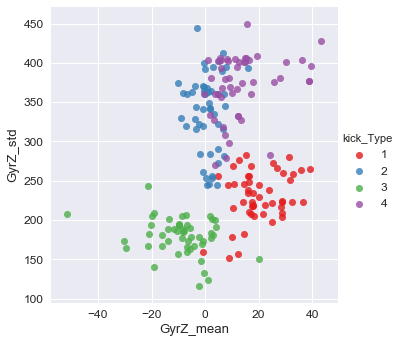

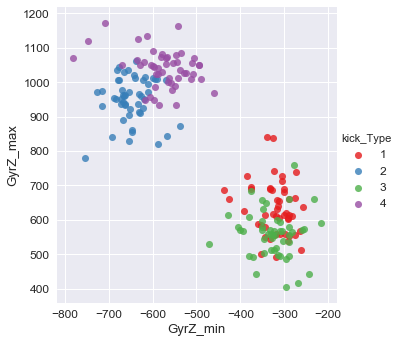

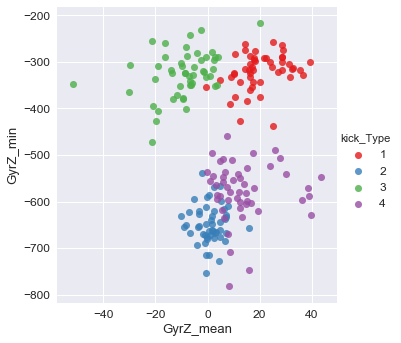

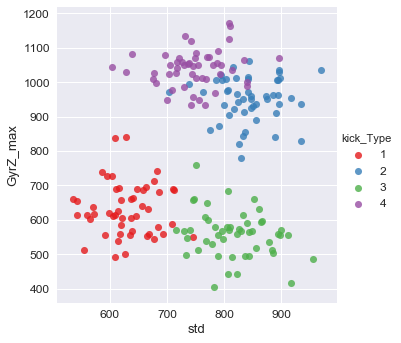

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer.csv')

sns.lmplot('mean', 'std',
           data=data,
           hue='kick_Type',
           #col='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_std', 'GyrZ_mean',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrX_min', 'GyrX_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_mean', 'GyrY_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrY_min', 'GyrY_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_std',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_min', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('GyrZ_mean', 'GyrZ_min',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

sns.lmplot('std', 'GyrZ_max',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

In [3]:
from sklearn import svm
#---Converting the Columns as Matrices---
points = data[['GyrZ_mean','GyrZ_std']].values
result = data['kick_Type']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [ 0.42263726 -0.04230425]
b =  8.01804531363499
Indices of support vectors =  [  6   8  12  17  19  20  21  27  30  50  51  55  56  57  58  59  63  64
  65  66  72  74  75  76  78  79  80  81  86  90  91  94 104 105 108 109
 117 135 142 151 152 157 158 160 162 164 167 168 170 172 174 175 176 178
 179 180 183 188 192 193 198]
Support vectors =  [[ 4.61500000e+00  2.56186347e+02]
 [ 1.02764706e+01  2.68630671e+02]
 [ 9.96885246e+00  1.78766138e+02]
 [ 1.51470588e+01  2.82471724e+02]
 [ 1.24180556e+01  1.57393555e+02]
 [ 8.53939394e+00  2.44934139e+02]
 [-6.32307692e-01  1.59617024e+02]
 [ 8.93064516e+00  1.52442068e+02]
 [ 1.25636364e+01  2.76055243e+02]
 [ 4.87804878e+00  2.90839810e+02]
 [ 4.88181818e+00  3.60429682e+02]
 [ 4.88846154e+00  2.72874303e+02]
 [ 5.21666667e+00  4.02851689e+02]
 [ 7.07037037e+00  3.60590133e+02]
 [ 3.26111111e+00  3.35104641e+02]
 [ 7.23870968e+00  3.44500414e+02]
 [ 4.44558824e+00  2.44840295e+02]
 [ 6.87708333e+00  2.81816255e+02]

Text(0.5,1,'Different kicking group')

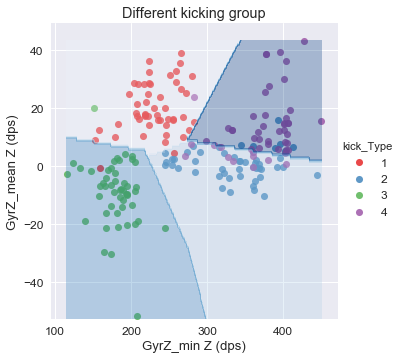

In [4]:
X = data[['GyrZ_std','GyrZ_mean']].values
y = result
model = svm.SVC(kernel='linear').fit(X, y)

sns.lmplot('GyrZ_std', 'GyrZ_mean',
           data=data,
           hue='kick_Type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = (x_max / x_min) / 20

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('GyrZ_min Z (dps)')
plt.ylabel('GyrZ_mean Z (dps)')
plt.title("Different kicking group")

In [5]:
def Kick(feature1, feature2):
    if(model.predict([[feature1, feature2]]))==1:
        print('Turning Kick!')
    elif(model.predict([[feature1, feature2]]))==2:
        print('AxeKick!')
    elif(model.predict([[feature1, feature2]]))==3:
        print('CutKick!')
    elif(model.predict([[feature1, feature2]]))==4:
        print('CrescentKick!')
        

In [6]:

Kick(-433.1, 10.24125)


CutKick!


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=5)



In [8]:
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)


(140, 2)
(140,)
(60, 2)
(60,)


In [9]:
print(x_train)

[[ 2.82443041e+02  2.40347826e+01]
 [ 3.75821348e+02  2.56520000e+01]
 [ 3.44500414e+02  7.23870968e+00]
 [ 4.04362313e+02  7.99615385e+00]
 [ 1.78766138e+02  9.96885246e+00]
 [ 3.41423227e+02  1.94545455e+00]
 [ 1.67419162e+02 -4.00689655e+00]
 [ 4.02720895e+02  4.67692308e+00]
 [ 1.57393555e+02  1.24180556e+01]
 [ 3.60590133e+02  7.07037037e+00]
 [ 3.67728370e+02  6.78571429e-01]
 [ 1.80999998e+02 -1.61807692e+01]
 [ 2.44840295e+02  4.44558824e+00]
 [ 1.85028732e+02 -8.24193548e+00]
 [ 1.24052733e+02  1.04354839e+00]
 [ 3.19430773e+02 -7.30555556e+00]
 [ 2.68572346e+02  1.69593750e+01]
 [ 4.03235096e+02  3.61541667e+01]
 [ 2.59633510e+02  2.89470588e+01]
 [ 3.61269375e+02 -8.16551724e+00]
 [ 3.33047561e+02  1.24135135e+01]
 [ 3.77195870e+02  3.88259259e+01]
 [ 2.05775064e+02  1.83583333e+01]
 [ 2.45470013e+02  1.60714286e+00]
 [ 2.15512590e+02  1.04400000e+01]
 [ 3.29639554e+02 -8.92812500e+00]
 [ 3.43590548e+02 -3.38965517e+00]
 [ 3.49563820e+02  1.41250000e+00]
 [ 3.57053136e+02  6

In [10]:
print(Y_train)

170    4
182    4
59     2
185    4
12     1
74     2
120    3
176    4
19     1
57     2
66     2
138    3
63     2
136    3
101    3
89     2
15     1
177    4
10     1
96     2
199    4
173    4
36     1
95     2
4      1
98     2
87     2
83     2
168    4
191    4
      ..
196    4
103    3
129    3
41     1
106    3
137    3
121    3
146    3
125    3
86     2
30     1
175    4
65     2
44     1
27     1
80     2
181    4
113    3
143    3
7      1
158    4
112    3
155    4
190    4
8      1
73     2
144    3
118    3
189    4
99     2
Name: kick_Type, Length: 140, dtype: int64


In [11]:

#---Converting the Columns as Matrices---
points = x_train
result = Y_train

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ',clf.intercept_[0])
print('Indices of support vectors = ', clf.support_)
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ',
       np.abs(clf.dual_coef_))

Vector of weights (w) =  [-0.0389572   0.50164196]
b =  6.308847691867186
Indices of support vectors =  [  4   8  39  83 120 124 134   2   9  10  12  30  37  42  55  59  61  69
  84  85 108 119 122 125  49  90  91 103   0   7  20  28  32  33  53  58
  63  64  66  75 104 121 130]
Support vectors =  [[ 1.78766138e+02  9.96885246e+00]
 [ 1.57393555e+02  1.24180556e+01]
 [ 2.44934139e+02  8.53939394e+00]
 [ 2.79717341e+02  3.11000000e+01]
 [ 2.76055243e+02  1.25636364e+01]
 [ 1.52442068e+02  8.93064516e+00]
 [ 2.68630671e+02  1.02764706e+01]
 [ 3.44500414e+02  7.23870968e+00]
 [ 3.60590133e+02  7.07037037e+00]
 [ 3.67728370e+02  6.78571429e-01]
 [ 2.44840295e+02  4.44558824e+00]
 [ 4.12132421e+02  6.71600000e+00]
 [ 3.15347255e+02  6.69111111e+00]
 [ 3.62878023e+02  1.08666667e+00]
 [ 2.45159693e+02  6.39344262e-01]
 [ 3.99240614e+02 -3.59259259e-01]
 [ 2.81816255e+02  6.87708333e+00]
 [ 3.93681186e+02  1.60037037e+01]
 [ 3.95176490e+02  3.01923077e+00]
 [ 3.95205951e+02  7.68518519e+00]
 

In [12]:
kick_pred = model.predict(x_test)
print(kick_pred)

[3 2 3 3 4 4 3 2 1 2 2 1 3 1 2 3 1 1 3 3 2 1 2 4 2 2 2 1 4 2 1 4 1 3 2 2 4
 3 3 1 4 2 4 1 1 1 2 1 2 3 3 3 1 2 3 1 4 3 2 3]


In [13]:
print(Y_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test,kick_pred))


119    3
77     2
148    3
149    3
154    4
151    4
122    3
6      1
28     1
71     2
188    4
34     1
21     1
40     1
55     2
104    3
3      1
39     1
117    3
134    3
180    4
26     1
54     2
165    4
53     2
93     2
174    4
17     1
56     2
84     2
25     1
156    4
42     1
141    3
50     2
51     2
195    4
116    3
142    3
24     1
159    4
62     2
166    4
45     1
23     1
1      1
162    4
48     1
160    4
126    3
123    3
107    3
43     1
152    4
114    3
46     1
172    4
102    3
61     2
115    3
Name: kick_Type, dtype: int64
Accuracy: 0.85


In [14]:
mykick = (x_test[0])
mykick = np.reshape(mykick, (-1, 2))

print(mykick)


[[169.70967545  -1.334375  ]]


In [15]:
print(model.predict(mykick))

[3]


rowcount  24
start 10 end 34
rowcount  21
start 69 end 90
rowcount  21
start 112 end 133
rowcount  20
start 178 end 198
rowcount  18
start 252 end 270
rowcount  21
start 301 end 322


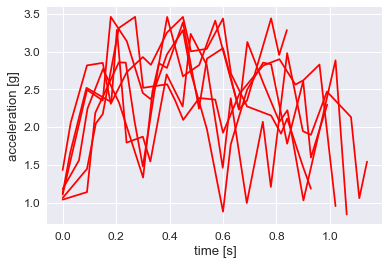

In [16]:
import os
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas

df = pandas.read_csv('csv\KickSession2_Accelerometer.csv', skiprows=4)
df.dropna(subset = ["Date"], inplace=True)
df2 = pandas.read_csv('csv\KickSession2_Gyroscope.csv', skiprows=4)
df2.dropna(subset = ["Date"], inplace=True)

export_list = []
index = []

acc = df['X (mg)']**2 + df['Y (mg)']**2 + df['Z (mg)']**2
acc = np.sqrt(acc)
acc = acc.astype('int64')
pandas.set_option('display.max_rows', None)
#print(*acc, sep = "\n")



foundStart = False
foundEnd = False
for i, j in enumerate(acc[:-2]):   
 
    if (j>1020)and(j < acc[i+1])and(acc[i+1] < acc[i+2])and(foundStart == False): 
        start = i
        rowcount = 1
        foundStart = True
        foundEnd = False
        index.append(start)
    elif (j > acc[i+1])and((j+acc[i+1]+acc[i+2])/3 < 1250)and(foundEnd == False)and(foundStart == True):
        end = i
        foundStart = False
        foundEnd = True
        index.append(end) 
        
        if(end-start < 15):
            index = index[:len(index)-2]
            continue
        
        print("rowcount ", end-start)    
        print("start " + str(start), "end " + str(end))
        acc_copy=acc.iloc[start:end]
        HostTime = df['HostTimestamp']
        HostTime=HostTime.iloc[start:end]
        HostTime = HostTime.astype('int64')
        HostTime -= HostTime[start]
        HostTime /= 1000
        acc_copy=np.array(acc_copy)/1000
        df2_copy=df2.iloc[start:end]
    
        HostTime = np.array(HostTime)
        
        export_list.append([acc_copy.mean(), acc_copy.std(), acc_copy.min(), acc_copy.max(), df2['X (dps)'].mean(), df2['X (dps)'].std(), df2['X (dps)'].min(), df2_copy['X (dps)'].max()
                   , df2_copy['Y (dps)'].mean(), df2_copy['Y (dps)'].std(), df2_copy['Y (dps)'].min(), df2_copy['Y (dps)'].max()
                   , df2_copy['Z (dps)'].mean(), df2_copy['Z (dps)'].std(), df2_copy['Z (dps)'].min(), df2_copy['Z (dps)'].max()])
        
        plt.plot(HostTime,acc_copy,'r-')
        plt.xlabel('time [s]')
        plt.ylabel('acceleration [g]')
        #plt.show()
#print(index) 


with open('Accelerometer_TestResult.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["mean", "std", "min", "max", "GyrX_mean", "GyrX_std", "GyrX_min", "GyrX_max"
                    , "GyrY_mean", "GyrY_std", "GyrY_min", "GyrY_max"
                    , "GyrZ_mean", "GyrZ_std", "GyrZ_min", "GyrZ_max"])
    for row in export_list:
        writer.writerow(row)


In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('Accelerometer_TestResult.csv')

print(data)

for index, row in data.iterrows():
    Kick(row.GyrZ_std, row.GyrZ_mean)

       mean       std    min    max  GyrX_mean    GyrX_std  GyrX_min  \
0  2.054917  0.653614  0.996  3.290  -8.819048  134.865661    -556.8   
1  2.338667  0.744836  0.844  3.458  -8.819048  134.865661    -556.8   
2  2.334048  0.672061  0.882  3.459  -8.819048  134.865661    -556.8   
3  2.497700  0.644513  1.185  3.458  -8.819048  134.865661    -556.8   
4  2.506389  0.701245  1.041  3.439  -8.819048  134.865661    -556.8   
5  2.358524  0.617429  0.955  3.459  -8.819048  134.865661    -556.8   

   GyrX_max  GyrY_mean    GyrY_std  GyrY_min  GyrY_max  GyrZ_mean    GyrZ_std  \
0     495.4  49.329167  263.378779    -362.1     619.4  36.179167  323.053249   
1     317.4  15.180952  211.457352    -288.1     573.4  -0.109524  478.867280   
2     497.0  22.409524  264.899296    -289.8     591.3 -12.957143  202.834355   
3     221.9 -27.400000  221.004803    -517.0     345.5  13.585000  479.671104   
4     431.1  39.361111  252.213183    -236.8     674.7 -19.550000  515.656636   
5     418